Take a look at these packages
- NLTK https://www.nltk.org/
- Spacy https://spacy.io/
- Stanford CoreNLP: https://stanfordnlp.github.io/CoreNLP/

Before using this notebook it is advicable to walk through the tutorial in the link https://dylancastillo.co/nlp-snippets-clean-and-tokenize-text-with-python/ to lean how to pre process text for NLP analysis.

### Reguler Expression Tutorial 
https://realpython.com/regex-python/

# Corpus

In [1]:
#!pip install nltk
import nltk
#nltk.download('udhr')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')
#nltk.download('brown')

In [2]:
# !pip install spacy
#!python -m spacy download en_core_web_sm

Example of corpus in NLTK
- Brown: The Brown Corpus was the first million-word electronic corpus of English
- Gutenberg: contains some 25,000 free electronic books
- Reuters: The Reuters Corpus contains 10,788 news documents totaling 1.3 million words
- Inaugural Address: 

### Brown Corpus
The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on.  
Good for studying systematic difference between genres.  

For a complete list of text in the corpus see http://icame.uib.no/brown/bcm-los.html.

In [3]:
import nltk
from nltk.corpus import brown

In [4]:
# Print the list of categories in the brown corpus
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Access the corpus as a list of words, or a list of sentences (where each sentence is itself just a list of words). 
We can optionally specify particular categories or files to read:

In [5]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [6]:
brown.words(categories='science_fiction')

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]

In [7]:
brown.fileids()[:10]

['ca01',
 'ca02',
 'ca03',
 'ca04',
 'ca05',
 'ca06',
 'ca07',
 'ca08',
 'ca09',
 'ca10']

In [8]:
brown.words(fileids=['ca10'])

['Vincent', 'G.', 'Ierulli', 'has', 'been', ...]

In [9]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [10]:
[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], 
 ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], 
 ...
 ]


[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.'],
 ['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 Ellipsis]

Let's compare genres in their usage of modal verbs. The first step is to produce the counts for a particular genre. Remember to import nltk before doing the following

In [11]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)

modals = ['what', 'when', 'where','can', 'could', 'may', 'might', 'must', 'will']

In [12]:
print("Number of occurances ")
for m in modals:
    print(m + ':', fdist[m])

Number of occurances 
what: 95
when: 169
where: 59
can: 94
could: 87
may: 93
might: 38
must: 53
will: 389


#### Counts for each genre of interest

In [13]:
cfd = nltk.ConditionalFreqDist((genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
                              )
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
cfd.tabulate(conditions=genres, samples=modals)

                 what  when where   can could   may might  must  will 
           news    76   128    58    93    86    66    38    50   389 
       religion    64    53    20    82    59    78    12    54    71 
        hobbies    78   119    72   268    58   131    22    83   264 
science_fiction    27    21    10    16    49     4    12     8    16 
        romance   121   126    54    74   193    11    51    45    43 
          humor    36    52    15    16    30     8     8     9    13 


Observe that the most frequent modal in the 
- news genre is _will_
- romance genre is _could_
- hobbies genre _can_ and _will_

#### Counting Words by Genre

In [14]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
               for word in brown.words(categories=genre)
)

In [15]:
genre_word = [(genre, word)
               for genre in ['news', 'romance']
                   for word in brown.words(categories=genre)
             ]
len(genre_word)

170576

In [16]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [17]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [18]:
cfd['romance'].most_common(20)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993),
 ('I', 951),
 ('in', 875),
 ('he', 702),
 ('had', 692),
 ('?', 690),
 ('her', 651),
 ('that', 583),
 ('it', 573),
 ('his', 559),
 ('she', 496)]

In [19]:
cfd['romance']['could']

193

### Corpora in Other Languages
NLTK also contains corpus from other languages

In [20]:
# Spanish
nltk.corpus.cess_esp.words()

LookupError: 
**********************************************************************
  Resource [93mcess_esp[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('cess_esp')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/cess_esp[0m

  Searched in:
    - 'C:\\Users\\ANSD/nltk_data'
    - 'c:\\Users\\ANSD\\OneDrive - Azubi Africa\\master\\DIT\\M2\\NLP2\\natural-language-processing\\venv\\nltk_data'
    - 'c:\\Users\\ANSD\\OneDrive - Azubi Africa\\master\\DIT\\M2\\NLP2\\natural-language-processing\\venv\\share\\nltk_data'
    - 'c:\\Users\\ANSD\\OneDrive - Azubi Africa\\master\\DIT\\M2\\NLP2\\natural-language-processing\\venv\\lib\\nltk_data'
    - 'C:\\Users\\ANSD\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Hindu 
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [22]:
from nltk.corpus import udhr
import pandas as pd
import matplotlib.pyplot as plt

languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word)) 
                               for lang in languages
                                   for word in udhr.words(lang + '-Latin1')
                              )

In [23]:
def plot_freq(lang):
    max_length = max([len(word) for word in udhr.words(lang + '-Latin1')])
    eng_freq_dist = {}

    for i in range(max_length + 1):
        eng_freq_dist[i] = cfd[lang].freq(i)

    ed = pd.Series(eng_freq_dist, name=lang)
    ed.cumsum().plot(legend=True, title='Cumulative Distribution of Word Lengths')

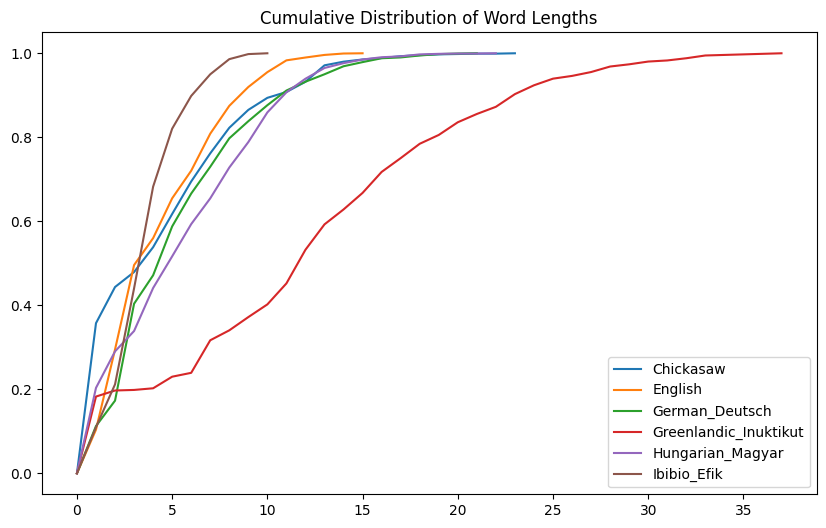

In [24]:
plt.subplots(figsize=(10, 6))
for lang in languages:
    plot_freq(lang)

Plot showing that words having 5 or fewer letters account for about 
- 80% of Ibibio text, 
- 60% of German text, 
- 25% of Inuktitut text

### Loading your own Corpus

In [25]:
from nltk.corpus import PlaintextCorpusReader

corpus_root = 'data/'  # root folder containing text file
wordlists = PlaintextCorpusReader(corpus_root, '.*') 

In [26]:
# list all files in root directory
wordlists.fileids()

['.DS_Store', 'a.txt', 'b.txt', 'republic_clean.txt', 'twitter_dataset.csv']

In [27]:
# select a file to processes
wordlists.words('b.txt')

['ON', 'THE', 'DUTY', 'OF', 'CIVIL', 'DISOBEDIENCE', ...]

# Tokenization
To illustrate tokenization we will use the spacy package

The simplest way to tokenize a sentence is to use whitespaces within a string as the delimiter of words. We can do this using the python string ***split()*** method

In [ ]:
sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
sentence.split()

['Monticello',
 "wasn't",
 'designated',
 'as',
 'UNESCO',
 'World',
 'Heritage',
 'Site',
 'until',
 '1987.']

In [ ]:
# tokenizer: builtin split function
token_sequence = sentence.split()
# list all unique token in your vocabulary sorted lexicographically
vocab = sorted(set(token_sequence))
print(vocab)

['1987.', 'Heritage', 'Monticello', 'Site', 'UNESCO', 'World', 'as', 'designated', 'until', "wasn't"]


#### Tokenization with Regular expression

In [ ]:
import re
sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
tokens = re.split(r'[-\s.,;!?]+', sentence)
print(tokens)

['Monticello', "wasn't", 'designated', 'as', 'UNESCO', 'World', 'Heritage', 'Site', 'until', '1987', '']


the regular expression is a sligh improvement of the whitespace method becuase it can handle punctuations

### 3.2.3. Automatic Tokenization

Most often in NLP, other characters besides whitespaces are used to separate words in a sentence/document. An efficient tokenizer should handle whitespaces as well as punctuations such as commas, periods, quotes, semicolons, and even hyphens (dashes). In some cases, it is relevant to treat punctuation marks as independent words or tokens, while in others they are ignored.

Tokenization can easily become complex. In one case, you might want to split based on periods, but only if the period isn’t followed by a number, to avoid splitting decimals. In another case, you might not want to split after a period that is part of “smiley” emoticon symbol, such as in a Twitter message.

Several Python libraries implement tokenizers, each with its advantages and disadvantages: 
- spaCy—Accurate , flexible, fast, Python
- Stanford CoreNLP—More accurate, less flexible, fast, depends on Java 8
- NLTK—Standard used by many NLP contests and comparisons, popular, Python

NLTK and Stanford CoreNLP have been around the longest and are the most widely used. 

#### 3.2.3.1. NLTK RegexpTokenizer
Natural Language Toolkit (NLTK) tokenizer function *RegexpTokenizer* to identify all tokens in a sentence.  
This nltk.RegexpTokenizer is better than the python string split function and the regular expressions used previously because it ignores whitespace tokens. It also separates sentence-ending trailing punctuation from tokens that do not contain any other punctuation character

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')

sentence = "The First sentence is about Python. The Second: about Django. You can learn Python,Django and Data Ananlysis here. "
vocab = tokenizer.tokenize(sentence)
print(vocab)

['The', 'First', 'sentence', 'is', 'about', 'Python', '.', 'The', 'Second', ':', 'about', 'Django', '.', 'You', 'can', 'learn', 'Python', ',Django', 'and', 'Data', 'Ananlysis', 'here', '.']


#### 3.2.3.2. NLTK TreebankWordTokenizer  
A more efficient tokenizer from the NLTK package is the Treebank Word Tokenizer. It incorporates a variety of common rules for English word tokenization. For example, it separates phrase-terminating punctuation (?!.;,) from adjacent tokens and retains decimal numbers containing a period as a single token.

In [31]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

sentence = "Finding sentence boundaries that include fractions like .02 or 4.3 are difficult. It becomes more complicated when the last word is an abbreviation like Dr. or D.C.."
print(tokenizer.tokenize(sentence))

['Finding', 'sentence', 'boundaries', 'that', 'include', 'fractions', 'like', '.02', 'or', '4.3', 'are', 'difficult.', 'It', 'becomes', 'more', 'complicated', 'when', 'the', 'last', 'word', 'is', 'an', 'abbreviation', 'like', 'Dr.', 'or', 'D.C..']


The Treebank Word Tokenizer contains rules for English contractions. For example *“wasn’t”* is tokenized as *["was", "n’t"]*.

#### 3.2.3.3. Spacy tokekinization

In [29]:
import spacy
# load the spaCy language model
# en_core_web_sm => 48mb
# en_core_web_md => 200mb
# en_core_web_lg => 500mb
sp = spacy.load('en_core_web_sm')

SpaCy automatically breaks your document into tokens when a document is created using the model.  
A token simply refers to an individual part of a sentence having some semantic value. Let's see what tokens we have in our document

In [32]:
spacy_sentence = sp(sentence)
tokens = []
for word in spacy_sentence:
    tokens.append(word)
    
print(tokens)

[Finding, sentence, boundaries, that, include, fractions, like, .02, or, 4.3, are, difficult, ., It, becomes, more, complicated, when, the, last, word, is, an, abbreviation, like, Dr., or, D.C, ..]


# Stemming and Lemmatization

### Stemming
Most stemming algorithms use a crude heuristic process that chops off the ends of words in the hope of correctly transforming words into their root form. So the words “trouble”, “troubled” and “troubles” might be converted to "troubl" instead of trouble. 

**Common Stemming algorithms**

1) **Porter’s Stemmer**

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

sentence_list = ["This", "sentence", "was", "transformed", "using", "a", "Stemmer"]
print (" ".join([stemmer.stem(word) for word in sentence_list]))

thi sentenc wa transform use a stemmer


2) **Snowball Stemmer**  
The SnowballStemmer is an improvement of the Porter's Stemmer and provided the best result.  

In [ ]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')
sentence_list = ["This", "sentence", "was", "transformed", "using", "a", "Stemmer"]

print (" ".join([stemmer.stem(word) for word in sentence_list]))

this sentenc was transform use a stemmer


3) **Lancaster Stemmer**

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

sentence_list = ["This", "sentence", "was", "transformed", "using", "a", "Stemmer"]
print (" ".join([stemmer.stem(word) for word in sentence_list]))

thi sent was transform us a stem


**Limitations of  Stemming:** 

There are two msin limitations of stemming
1) Over-stemming: occurs when two words are stemmed from the same root that are of different stems. Over-stemming can also be regarded as false-positives.  
2) Under-stemming: occurs when two words are stemmed from the same root that are not of different stems. Under-stemming can be interpreted as false-negatives. 

### Lemmatization  
Lemmatization is the algorithmic process of finding the lemma of a word depending on their meaning. Lemmatization usually refers to the morphological analysis of words, which aims to remove inflectional endings. It helps in returning the base or dictionary form of a word, which is known as the lemma. 

Stemming algorithm works by cutting the suffix from the word. In a broader sense cuts either the beginning or end of the word. On the contrary, Lemmatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms. In-depth linguistic knowledge is required to create dictionaries and look for the proper form of the word. Stemming is a general operation while lemmatization is an intelligent operation where the proper form will be looked in the dictionary. Hence, lemmatization helps in forming better machine learning features.  

Lemmatizer minimizes text ambiguity. Example words like bicycle or bicycles are converted to base word bicycle. Basically, it will convert all words having the same meaning but different representation to their base form. It reduces the word density in the given text and helps in preparing the accurate features for training machine. Cleaner the data, the more intelligent and accurate your machine learning model, will be. Lemmatizerwill also saves memory as well as computational cost. 

In [ ]:
from nltk.stem import WordNetLemmatizer

sentence_list = ["This","sentence","was","transformed", "using", "WordNet", "Lemmatizer"]
# sentence_list = ["Monticello", "wasn't", "designated", "as", "UNESCO", "World", "Heritage", "Site", "until", "1987."]

# initialize class
lemmatizer = WordNetLemmatizer()
print (" ".join([lemmatizer.lemmatize(word) for word in sentence_list]))

This sentence wa transformed using WordNet Lemmatizer


#### Spacy lematization
Spacy also automatically perform lematization

In [ ]:
import spacy
sp = spacy.load('en_core_web_lg')

# sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
sentence = "This sentence was transformed using WordNet Lemmatizer"
spacy_sentence = sp(sentence)
for word in spacy_sentence:
    print(word.text, " => ", word.lemma_)

This  =>  this
sentence  =>  sentence
was  =>  be
transformed  =>  transform
using  =>  use
WordNet  =>  WordNet
Lemmatizer  =>  Lemmatizer


In [ ]:
sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
spacy_sentence = sp(sentence)
for word in spacy_sentence:
    print(word.text, " => ", word.lemma_)

Monticello  =>  Monticello
was  =>  be
n't  =>  not
designated  =>  designate
as  =>  as
UNESCO  =>  UNESCO
World  =>  World
Heritage  =>  Heritage
Site  =>  Site
until  =>  until
1987  =>  1987
.  =>  .


## Sentence Segmentation

In [ ]:
## using a simple rule-based segmenter with native python code
def sentence_segmenter(text):
    current_position = 0
    cursor = 0
    sentences = []
    for c in text:
        if c == "." or c == "!" or c == "?":
            sentences.append(text[current_position:cursor+1])
            current_position = cursor + 2
        cursor+=1
        
    return sentences


In [ ]:
text = "NeMo is a toolkit for creating Conversational AI applications. \
NeMo toolkit makes it possible for researchers to easily compose complex neural network architectures \
for conversational AI using reusable components - Neural Modules. \
Neural Modules are conceptual blocks of neural networks that take typed inputs and produce typed outputs. \
Such modules typically represent data layers, encoders, decoders, language models, loss functions, or methods of combining activations. \
The toolkit comes with extendable collections of pre-built modules and ready-to-use models for automatic speech recognition (ASR), \
natural language processing (NLP) and text synthesis (TTS). \
Built for speed, NeMo can utilize NVIDIA's Tensor Cores and scale out training to multiple GPUs and multiple nodes."

In [ ]:
text1 = "We need to get better, simple as that! We've done really well this season coming through. \
    The start was difficult. We had no preseason and lost three of the first six."
sentences1 = sentence_segmenter(text1)
for sen in sentences1:
    print(sen)

We need to get better, simple as that!
We've done really well this season coming through.
    The start was difficult.
We had no preseason and lost three of the first six.


Our sentence segmenter only segments sentences when it meets a sentence boundary which in this case is either a "." or a "!".  
- If we change a single sentence and add say a "?" or abbreviations the sign our code will miss one of the sentences

In [ ]:
text2 = "We need to get better, simple as that! We've done really well this season coming through. \
    The start was difficult in D.C.? We had no preseason and lost three of the first six."
sentences2 = sentence_segmenter(text2)
for sen in sentences2:
    print(sen)

We need to get better, simple as that!
We've done really well this season coming through.
    The start was difficult in D.
.

We had no preseason and lost three of the first six.


### NLTK sentence segmentation

In [ ]:
from nltk.tokenize import sent_tokenize

nltk_tokens = sent_tokenize(text1)
print (nltk_tokens)

['We need to get better, simple as that!', "We've done really well this season coming through.", 'The start was difficult.', 'We had no preseason and lost three of the first six.']


In [ ]:
nltk_tokens = sent_tokenize(text2)
print (nltk_tokens)

['We need to get better, simple as that!', "We've done really well this season coming through.", 'The start was difficult in D.C.?', 'We had no preseason and lost three of the first six.']


### Spacy sentence segmentation

In [ ]:
spacy_sentence1 = sp(text1)
for sent in spacy_sentence1.sents:
    print(sent.text)

We need to get better, simple as that!
We've done really well this season coming through.     
The start was difficult.
We had no preseason and lost three of the first six.


In [ ]:
spacy_sentence2 = sp(text2)
for sent in spacy_sentence2.sents:
    print(sent.text)

We need to get better, simple as that!
We've done really well this season coming through.     
The start was difficult in D.C.?
We had no preseason and lost three of the first six.


# Exercise Vocabulary

Exercise: Get the wikipedia page extract all text and create a vocabulary   
**Task:** 
1) Process the document and create a vocabulary  
2) Perform exploratory analysis on the vocabulary  

In [52]:
import bs4 as bs
import urllib

url = "https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers" # replace with wikipedia link 

raw_html = urllib.request.urlopen(url)  
raw_html = raw_html.read()

wiki_html = bs.BeautifulSoup(raw_html)
article_paragraphs = wiki_html.find_all('p')
article_text = ''
for para in article_paragraphs:  
    article_text += para.text

In [58]:
print(article_text)

sources: fawcett (2006),[1] piryonesi and el-diraby (2020),[2]
powers (2011),[3] ting (2011),[4] cawcr,[5] d. chicco & g. jurman (2020, 2021, 2023),[6][7][8]  tharwat (2018).[9] balayla (2020)[10]
the evaluation of binary classifiers compares two methods of assigning a binary attribute, one of which is usually a standard method and the other is being investigated. there are many metrics that can be used to measure the performance of a classifier or predictor; different fields have different preferences for specific metrics due to different goals. for example, in medicine sensitivity and specificity are often used, while in computer science precision and recall are preferred. an important distinction is between metrics that are independent on the prevalence (how often each category occurs in the population), and metrics that depend on the prevalence – both types are useful, but they have very different properties.
probabilistic classification models go beyond providing binary outputs an

In [59]:
# Lower casing
article_text = article_text.lower()

In [60]:
# Removal of Punctuations
# drop the new column created in last cell
#df.drop(["text_lower"], axis=1, inplace=True)
import string

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

article_text_rm_punt = remove_punctuation(article_text)
article_text_rm_punt

'sources fawcett 20061 piryonesi and eldiraby 20202\npowers 20113 ting 20114 cawcr5 d chicco  g jurman 2020 2021 2023678  tharwat 20189 balayla 202010\nthe evaluation of binary classifiers compares two methods of assigning a binary attribute one of which is usually a standard method and the other is being investigated there are many metrics that can be used to measure the performance of a classifier or predictor different fields have different preferences for specific metrics due to different goals for example in medicine sensitivity and specificity are often used while in computer science precision and recall are preferred an important distinction is between metrics that are independent on the prevalence how often each category occurs in the population and metrics that depend on the prevalence – both types are useful but they have very different properties\nprobabilistic classification models go beyond providing binary outputs and instead produce probability scores for each class thes

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANSD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [64]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [65]:
# Removal of Stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

article_text_stop_rm = remove_stopwords(article_text_rm_punt)
article_text_stop_rm

'sources fawcett 20061 piryonesi eldiraby 20202 powers 20113 ting 20114 cawcr5 chicco g jurman 2020 2021 2023678 tharwat 20189 balayla 202010 evaluation binary classifiers compares two methods assigning binary attribute one usually standard method investigated many metrics used measure performance classifier predictor different fields different preferences specific metrics due different goals example medicine sensitivity specificity often used computer science precision recall preferred important distinction metrics independent prevalence often category occurs population metrics depend prevalence – types useful different properties probabilistic classification models go beyond providing binary outputs instead produce probability scores class models designed assess likelihood probability instance belonging different classes context evaluating probabilistic classifiers alternative evaluation metrics developed properly assess performance models metrics take account probabilistic nature cl

In [68]:
#token
spacy_sentence = sp(article_text_stop_rm)
article_tokens = []
for word in spacy_sentence:
    article_tokens.append(word)
    
article_tokens

[sources,
 fawcett,
 20061,
 piryonesi,
 eldiraby,
 20202,
 powers,
 20113,
 ting,
 20114,
 cawcr5,
 chicco,
 g,
 jurman,
 2020,
 2021,
 2023678,
 tharwat,
 20189,
 balayla,
 202010,
 evaluation,
 binary,
 classifiers,
 compares,
 two,
 methods,
 assigning,
 binary,
 attribute,
 one,
 usually,
 standard,
 method,
 investigated,
 many,
 metrics,
 used,
 measure,
 performance,
 classifier,
 predictor,
 different,
 fields,
 different,
 preferences,
 specific,
 metrics,
 due,
 different,
 goals,
 example,
 medicine,
 sensitivity,
 specificity,
 often,
 used,
 computer,
 science,
 precision,
 recall,
 preferred,
 important,
 distinction,
 metrics,
 independent,
 prevalence,
 often,
 category,
 occurs,
 population,
 metrics,
 depend,
 prevalence,
 –,
 types,
 useful,
 different,
 properties,
 probabilistic,
 classification,
 models,
 go,
 beyond,
 providing,
 binary,
 outputs,
 instead,
 produce,
 probability,
 scores,
 class,
 models,
 designed,
 assess,
 likelihood,
 probability,
 instance

In [73]:
[str(word).lower() for word in article_tokens]

['sources',
 'fawcett',
 '20061',
 'piryonesi',
 'eldiraby',
 '20202',
 'powers',
 '20113',
 'ting',
 '20114',
 'cawcr5',
 'chicco',
 'g',
 'jurman',
 '2020',
 '2021',
 '2023678',
 'tharwat',
 '20189',
 'balayla',
 '202010',
 'evaluation',
 'binary',
 'classifiers',
 'compares',
 'two',
 'methods',
 'assigning',
 'binary',
 'attribute',
 'one',
 'usually',
 'standard',
 'method',
 'investigated',
 'many',
 'metrics',
 'used',
 'measure',
 'performance',
 'classifier',
 'predictor',
 'different',
 'fields',
 'different',
 'preferences',
 'specific',
 'metrics',
 'due',
 'different',
 'goals',
 'example',
 'medicine',
 'sensitivity',
 'specificity',
 'often',
 'used',
 'computer',
 'science',
 'precision',
 'recall',
 'preferred',
 'important',
 'distinction',
 'metrics',
 'independent',
 'prevalence',
 'often',
 'category',
 'occurs',
 'population',
 'metrics',
 'depend',
 'prevalence',
 '–',
 'types',
 'useful',
 'different',
 'properties',
 'probabilistic',
 'classification',
 'models

In [76]:
# Stemming
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')
#sentence_list = ["This", "sentence", "was", "transformed", "using", "a", "Stemmer"]

article_stemmed = [stemmer.stem(str(word)) for word in article_tokens]
article_stemmed[0:12]

['sourc',
 'fawcett',
 '20061',
 'piryonesi',
 'eldirabi',
 '20202',
 'power',
 '20113',
 'ting',
 '20114',
 'cawcr5',
 'chicco']

In [79]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

# initialize class
lemmatizer = WordNetLemmatizer()
article_lemmed = [lemmatizer.lemmatize(str(word)) for word in article_tokens]
article_lemmed

['source',
 'fawcett',
 '20061',
 'piryonesi',
 'eldiraby',
 '20202',
 'power',
 '20113',
 'ting',
 '20114',
 'cawcr5',
 'chicco',
 'g',
 'jurman',
 '2020',
 '2021',
 '2023678',
 'tharwat',
 '20189',
 'balayla',
 '202010',
 'evaluation',
 'binary',
 'classifier',
 'compare',
 'two',
 'method',
 'assigning',
 'binary',
 'attribute',
 'one',
 'usually',
 'standard',
 'method',
 'investigated',
 'many',
 'metric',
 'used',
 'measure',
 'performance',
 'classifier',
 'predictor',
 'different',
 'field',
 'different',
 'preference',
 'specific',
 'metric',
 'due',
 'different',
 'goal',
 'example',
 'medicine',
 'sensitivity',
 'specificity',
 'often',
 'used',
 'computer',
 'science',
 'precision',
 'recall',
 'preferred',
 'important',
 'distinction',
 'metric',
 'independent',
 'prevalence',
 'often',
 'category',
 'occurs',
 'population',
 'metric',
 'depend',
 'prevalence',
 '–',
 'type',
 'useful',
 'different',
 'property',
 'probabilistic',
 'classification',
 'model',
 'go',
 'beyo

In [83]:
# create vocabulary
from collections import Counter
# Use Counter to create a vocabulary with word frequencies
vocab_counter = Counter(article_stemmed)
vocabulary = list(vocab_counter.keys())

print(vocabulary)


['sourc', 'fawcett', '20061', 'piryonesi', 'eldirabi', '20202', 'power', '20113', 'ting', '20114', 'cawcr5', 'chicco', 'g', 'jurman', '2020', '2021', '2023678', 'tharwat', '20189', 'balayla', '202010', 'evalu', 'binari', 'classifi', 'compar', 'two', 'method', 'assign', 'attribut', 'one', 'usual', 'standard', 'investig', 'mani', 'metric', 'use', 'measur', 'perform', 'predictor', 'differ', 'field', 'prefer', 'specif', 'due', 'goal', 'exampl', 'medicin', 'sensit', 'often', 'comput', 'scienc', 'precis', 'recal', 'import', 'distinct', 'independ', 'preval', 'categori', 'occur', 'popul', 'depend', '–', 'type', 'properti', 'probabilist', 'classif', 'model', 'go', 'beyond', 'provid', 'output', 'instead', 'produc', 'probabl', 'score', 'class', 'design', 'assess', 'likelihood', 'instanc', 'belong', 'context', 'altern', 'develop', 'proper', 'take', 'account', 'natur', 'comprehens', 'effect', 'accur', 'aim', 'captur', 'degre', 'calibr', 'discrimin', 'overal', 'accuraci', 'predict', 'given', 'data',

In [85]:
# Get the most common words and their frequencies
most_common_words = vocab_counter.most_common(10)

# Calculate the total number of unique words in the vocabulary
total_unique_words = len(vocabulary)

# Calculate the total number of words in the text
total_words_in_text = len(article_stemmed)

# Calculate the lexical diversity (ratio of unique words to total words)
lexical_diversity = total_unique_words / total_words_in_text

print("Most common words:", most_common_words)
print("Total unique words in the vocabulary:", total_unique_words)
print("Total words in the text:", total_words_in_text)
print("Lexical diversity:", lexical_diversity)


Most common words: [('posit', 35), ('negat', 30), ('test', 27), ('ratio', 21), ('true', 18), ('use', 15), ('predict', 14), ('classifi', 13), ('number', 13), ('valu', 13)]
Total unique words in the vocabulary: 454
Total words in the text: 1176
Lexical diversity: 0.38605442176870747
